# Creando una figura

### Datos anteriores

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data/Inmigrantes_Canadá.csv')
df.set_index('Pais', inplace=True)
anos = list(map(str, range(1980, 2014)))
chile = df.loc['Chile', anos]
cl_dict = {'Año': chile.index.tolist(), 'Inmigrantes': chile.values.tolist()}
datos_cl = pd.DataFrame(cl_dict)

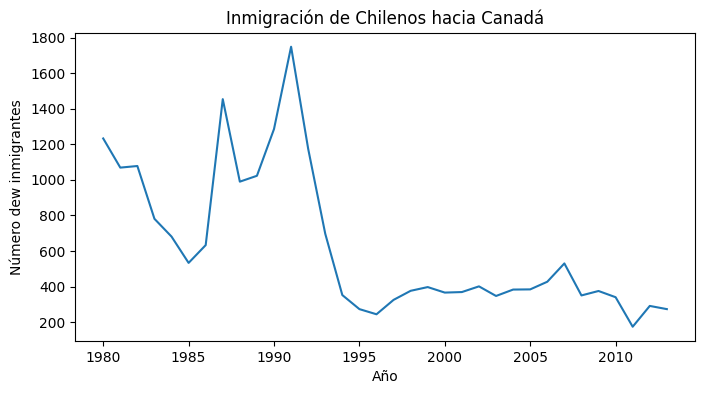

In [13]:
# Datos anteriores
plt.figure(figsize=(8, 4))
plt.plot(datos_cl.Año, datos_cl.Inmigrantes)
plt.xticks(["1980", "1985", "1990", "1995", "2000", "2005", "2010"])

# Para el título
plt.title("Inmigración de Chilenos hacia Canadá")

# Etiquetas eje x e y
plt.xlabel("Año")
plt.ylabel("Número dew inmigrantes")

plt.show()  # debe ser el último comando!

Al trabajar sin almacenar en variables nos perderemos de una serie de métodos que permitirán mejorar el gráfico.
Hasta el momento tenemos:
- lienzo
- gráfico

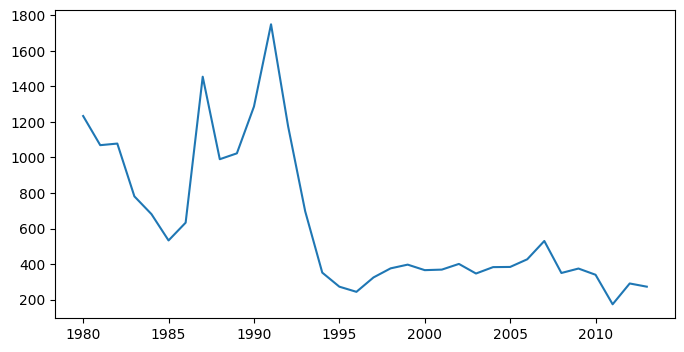

In [ ]:
# fig -> lienzo, ax -> gráfico
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(datos_cl["Año"], datos_cl["Inmigrantes"])

# permitirá configurar ticks de forma dinámica en steps de 5
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

# Añadiendo títulos y rótulos en la figura

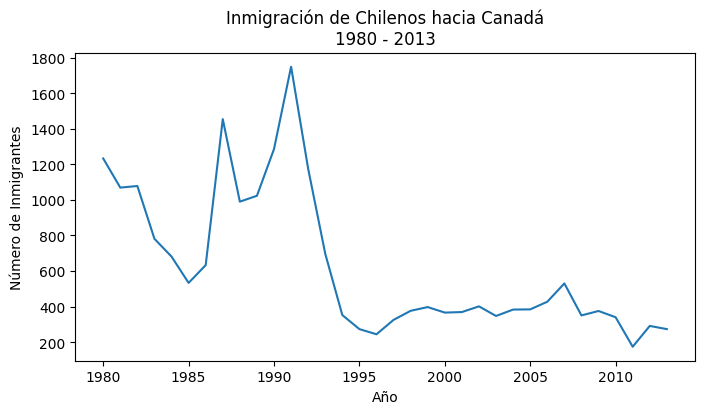

In [16]:
# fig -> lienzo, ax -> gráfico
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(datos_cl["Año"], datos_cl["Inmigrantes"])

# permitirá configurar ticks de forma dinámica en steps de 5
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

# Título y rótulos
ax.set_title('Inmigración de Chilenos hacia Canadá\n1980 - 2013')
ax.set_xlabel('Año')
ax.set_ylabel('Número de Inmigrantes')

plt.show()

# Creando subplots en una dirección
Gráfico de cajas permite referenciar diversos valores descriptivos de una selección de datos. Solo medirá una variable, y la que se querrá medir es la cantidad de inmigrantes chilenos.

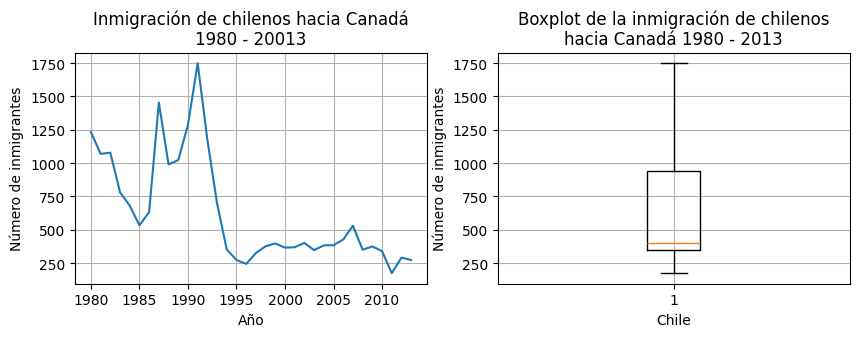

In [20]:
# se puede especificar las filas y cantidad de columnas
# en este caso se quiere una fila  con 2 gráficas
fig, axs = plt.subplots(1, 2, figsize=(10,3))

# trabajando primera gráfica
axs[0].plot(datos_cl["Año"], datos_cl["Inmigrantes"])
axs[0].set_title('Inmigración de chilenos hacia Canadá\n1980 - 20013')
axs[0].set_xlabel('Año')
axs[0].set_ylabel('Número de inmigrantes')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[0].grid()

# segunda gráfica
axs[1].boxplot(datos_cl['Inmigrantes'])
axs[1].set_title('Boxplot de la inmigración de chilenos\nhacia Canadá 1980 - 2013')
axs[1].set_xlabel('Chile')
axs[1].set_ylabel('Número de inmigrantes')
axs[1].grid()

plt.show()

La lectura del boxplot indica valores mínimos y máximos. 
- El rectángulo contiene la información del primer cuartil (como se comportó el conjunto de datos durante el 25% del período analizado), 
- El 50% de todo el período, o segundo cuartil, analizado (línea naranja), también corresponde a la mediana (datos ordenados de mayor a menor y el dato de la mitad es la mediana)
- Hasta el 75% de los datos del período analizado corresponde a la parte superior del rectángulo

In [22]:
# Corroborar boxplot
datos_cl.describe()

# mean -> promedio
# std -> desvío estandar


,Inmigrantes
count,34.000000
mean,628.205882
std,405.464625
min,174.000000
25%,350.500000
50%,399.000000
75%,937.750000
max,1749.000000


# Creando subplots en 2 direcciones
Se procederá a analizar la información de otros países de sudamérica:
- Argentina
- Brasil
- Perú

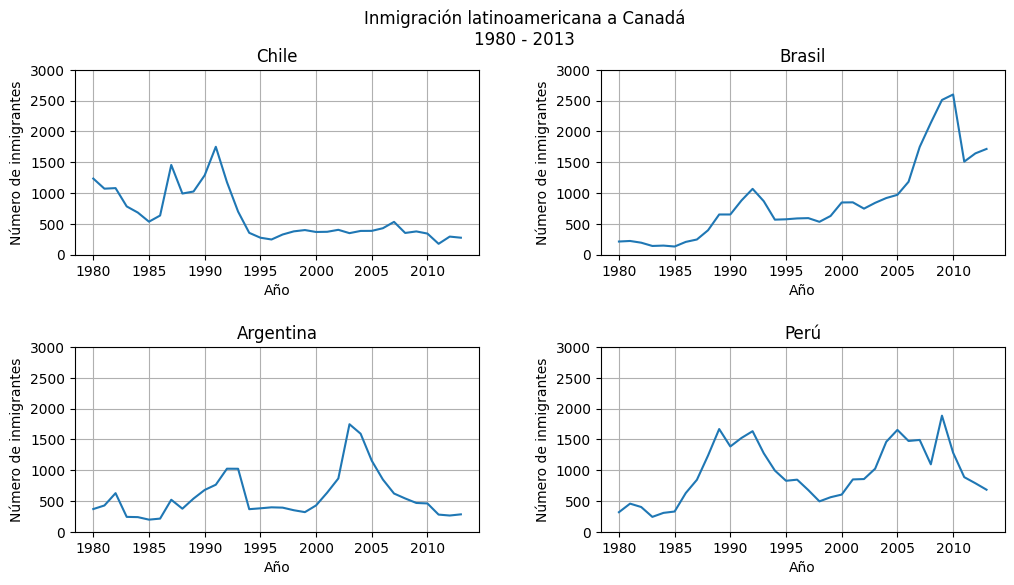

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Cambiar espacio entre gráficas
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Título para la gráfica completa
fig.suptitle('Inmigración latinoamericana a Canadá\n1980 - 2013')

axs[0, 0].plot(df.loc["Chile", anos])
axs[0,0].set_title('Chile')

axs[0, 1].plot(df.loc["Brasil", anos])
axs[0,1].set_title('Brasil')

axs[1, 0].plot(df.loc["Argentina", anos])
axs[1,0].set_title('Argentina')

axs[1, 1].plot(df.loc["Perú", anos])
axs[1,1].set_title('Perú')

# Ajustando escala:
ymin = 0
ymax = 3000
# Ravel permite tomar un array multidimensional y traerlo a uno unidimensional
for ax in axs.ravel():
  ax.set_ylim(ymin, ymax)

# Ajuste para mejorar visualización de años, iterando con ciclo for
for ax in axs.flat:
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))
  ax.set_xlabel('Año')
  ax.set_ylabel('Número de inmigrantes')
  ax.grid()


plt.show()
